# **Diabetes Prediction**

# 1) Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Necessary libraries
import numpy as np
import pandas as pd

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import modules required model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# for saving model
import joblib

# for creating a pipeline
from sklearn.pipeline import Pipeline

# Set the decimal format
pd.options.display.float_format = "{:.2f}".format

# 2) Basic Exploration

## 2.1) Importing dataset

In [2]:
import kagglehub

# Download the latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

print("Path to dataset files:", path)

df = pd.read_csv(path + "/diabetes.csv")

Path to dataset files: C:\Users\tehran\.cache\kagglehub\datasets\akshaydattatraykhare\diabetes-dataset\versions\1


In [3]:
# df = pd.read_csv('./data/diabetes.csv')

## 2.2) Some information

### 2.2.1) Display data content

In [4]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
731,8,120,86,0,0,28.40,0.26,22,1
224,1,100,66,15,56,23.60,0.67,26,0
698,4,127,88,11,155,34.50,0.60,28,0
1,1,85,66,29,0,26.60,0.35,31,0
586,8,143,66,0,0,34.90,0.13,41,1
605,1,124,60,32,0,35.80,0.51,21,0
195,5,158,84,41,210,39.40,0.40,29,1
346,1,139,46,19,83,28.70,0.65,22,0
71,5,139,64,35,140,28.60,0.41,26,0
11,10,168,74,0,0,38.00,0.54,34,1


### 2.2.2) Number of rows & columns

In [5]:
rows , col =  df.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")

Number of Rows : 768 
Number of Columns : 9


### 2.2.3) Basic info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 2.2.4) Checking for Missing Values

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 2.2.5) Checking for Duplicates

In [8]:
df.duplicated().sum()

0

### 2.2.6) Summary statistics

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


## 2.3) Data visualization

### 2.3.1) Distributions of attributes & target

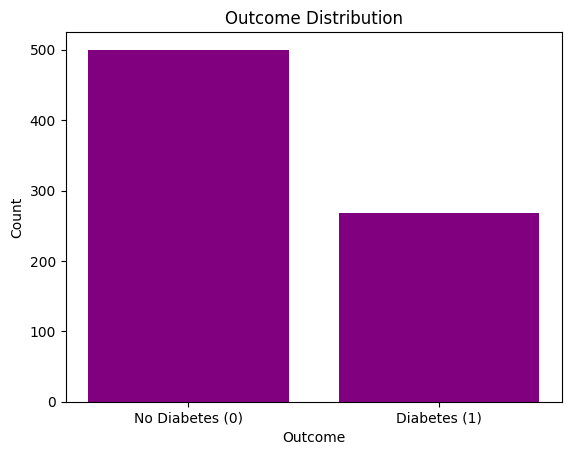

In [10]:
outcome_counts = df['Outcome'].value_counts()
plt.bar(outcome_counts.index, outcome_counts.values, color='purple')
plt.xlabel("Outcome")
plt.title("Outcome Distribution")
plt.xticks(outcome_counts.index, ['No Diabetes (0)', 'Diabetes (1)'])
plt.ylabel("Count")
plt.show()

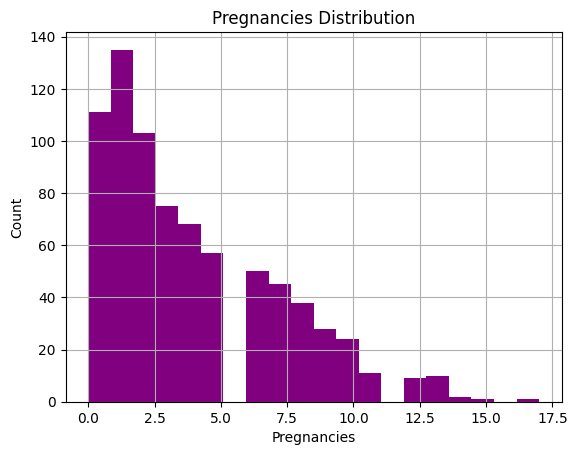

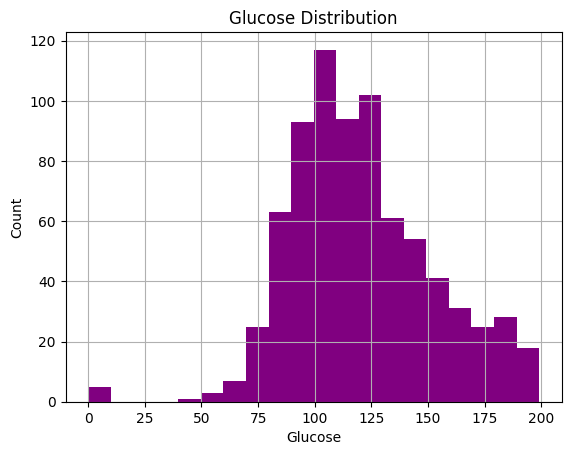

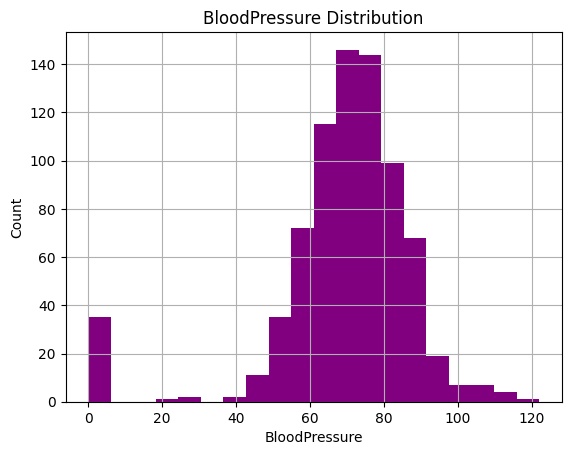

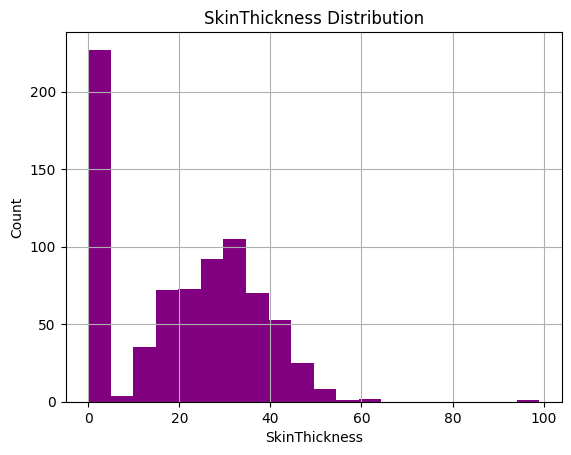

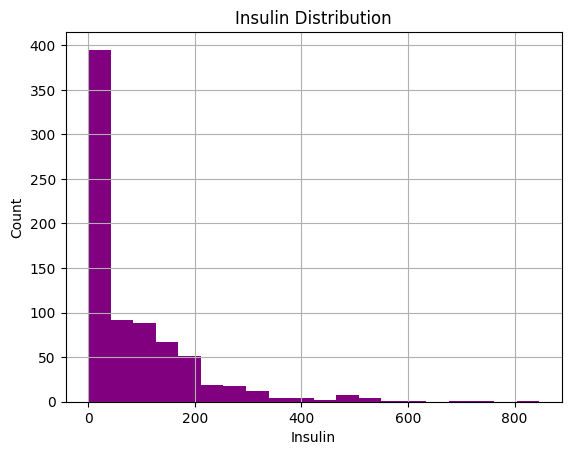

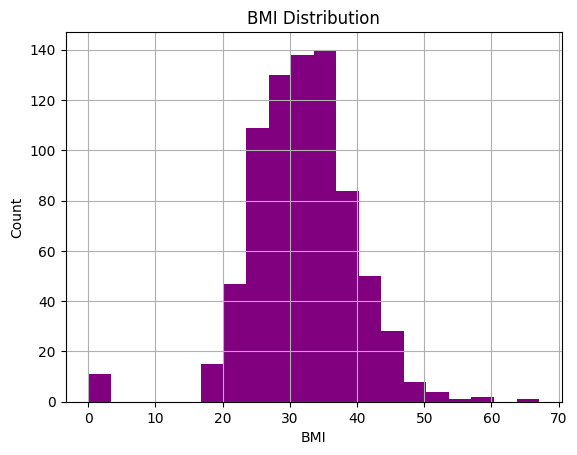

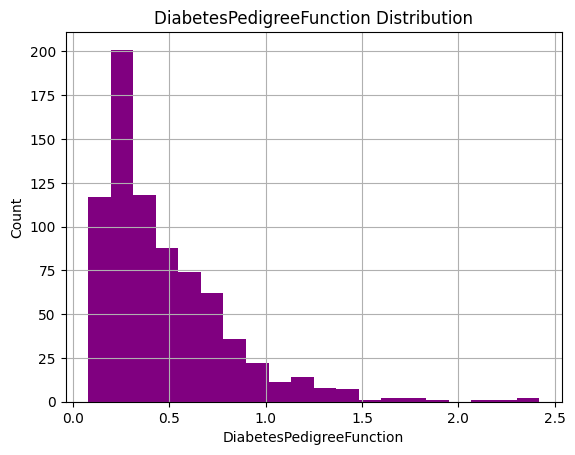

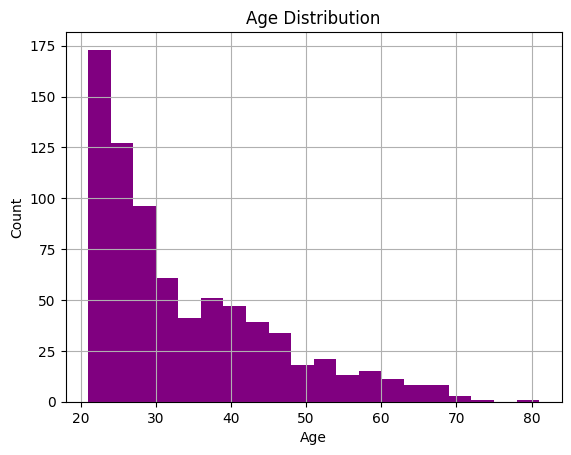

In [11]:
num_cols = df.drop("Outcome", axis='columns')

def attributes_distribution(df, numerical_col, plot=False):
    if plot:
        df[numerical_col].hist(bins=20, color='purple')
        plt.xlabel(numerical_col)
        plt.ylabel("Count")
        plt.title(f"{numerical_col} Distribution")
        plt.show(block=True)

for col in num_cols:
    attributes_distribution(df, col, plot=True)

### 2.3.2) Pregnancies and Outcome

Text(0.5, 1.0, 'Age and Outcome Correlation')

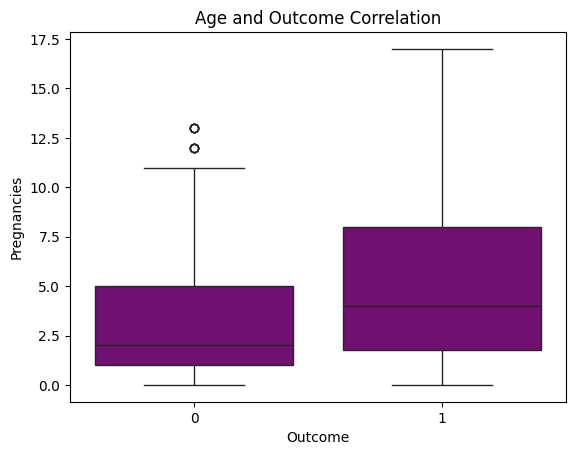

In [12]:
sns.boxplot(x="Outcome", y="Pregnancies", data=df, color='purple')
plt.title("Age and Outcome Correlation")

### 2.3.3) Glucose and Outcome

Text(0.5, 1.0, 'Glucose and Outcome Correlation')

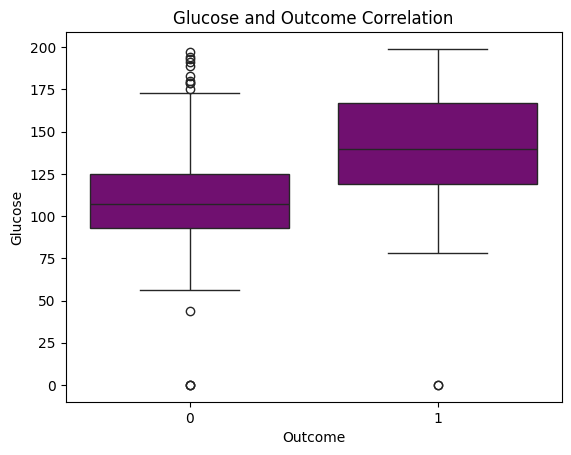

In [13]:
sns.boxplot(x="Outcome", y="Glucose", data=df, color='purple')
plt.title("Glucose and Outcome Correlation")

### 2.3.4) BloodPressure and Outcome

Text(0.5, 1.0, 'BloodPressure and Outcome Correlation')

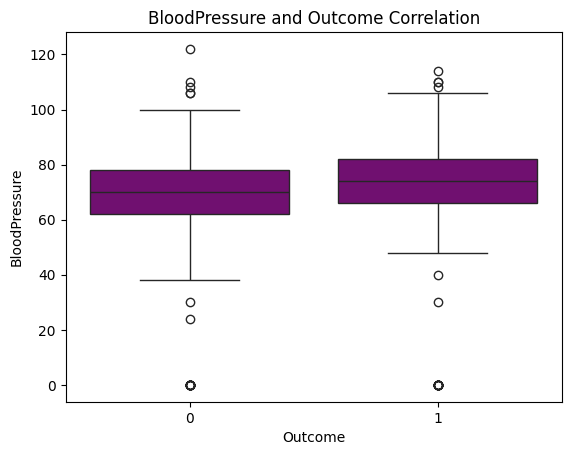

In [14]:
sns.boxplot(x="Outcome", y="BloodPressure", data=df, color='purple')
plt.title("BloodPressure and Outcome Correlation")

### 2.3.5) SkinThickness and Outcome

Text(0.5, 1.0, 'SkinThickness and Outcome Correlation')

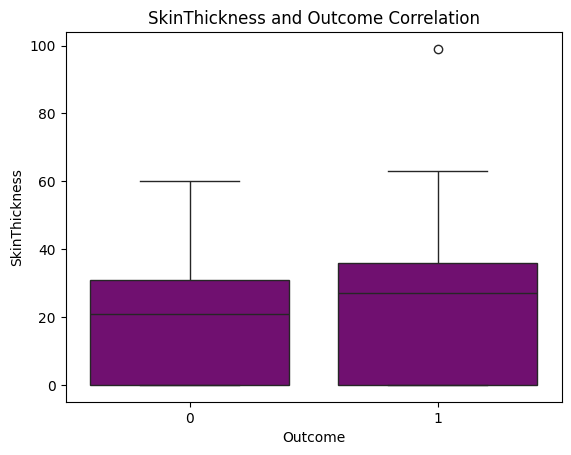

In [15]:
sns.boxplot(x="Outcome", y="SkinThickness", data=df, color='purple')
plt.title("SkinThickness and Outcome Correlation")

### 2.3.6) Insulin and Outcome

Text(0.5, 1.0, 'Insulin and Outcome Correlation')

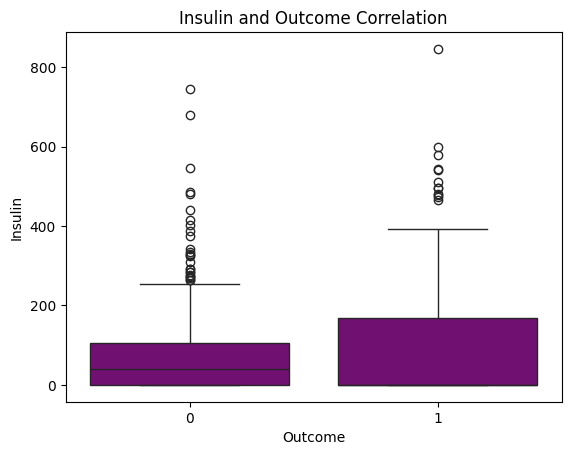

In [16]:
sns.boxplot(x="Outcome", y="Insulin", data=df, color='purple')
plt.title("Insulin and Outcome Correlation")

### 2.3.7) BMI and Outcome

Text(0.5, 1.0, 'BMI and Outcome Correlation')

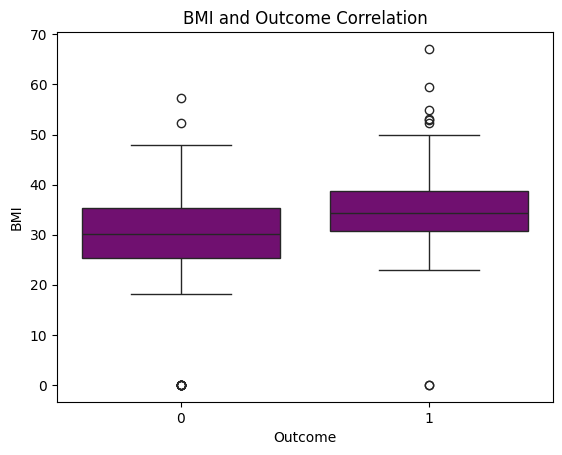

In [17]:
sns.boxplot(x="Outcome", y="BMI", data=df, color='purple')
plt.title("BMI and Outcome Correlation")

### 2.3.8) DiabetesPedigreeFunction and Outcome

Text(0.5, 1.0, 'DiabetesPedigreeFunction and Outcome Correlation')

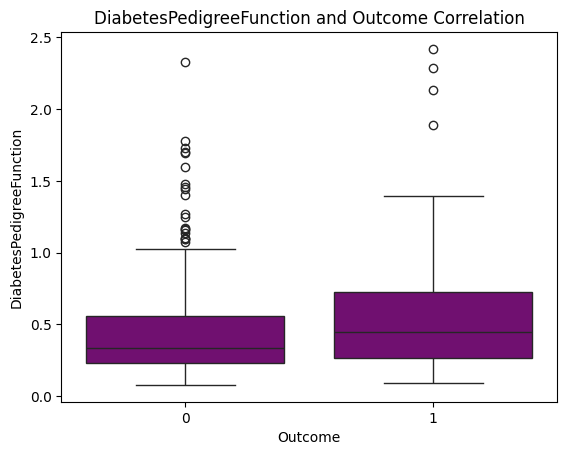

In [18]:
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=df, color='purple')
plt.title("DiabetesPedigreeFunction and Outcome Correlation")

### 2.3.9) Age and Outcome

Text(0.5, 1.0, 'Age and Outcome Correlation')

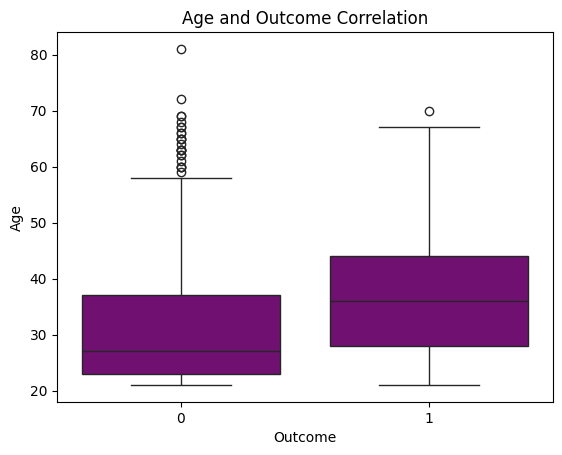

In [19]:
sns.boxplot(x="Outcome", y="Age", data=df, color='purple')
plt.title("Age and Outcome Correlation")

### 2.3.10) Correlation between attributes

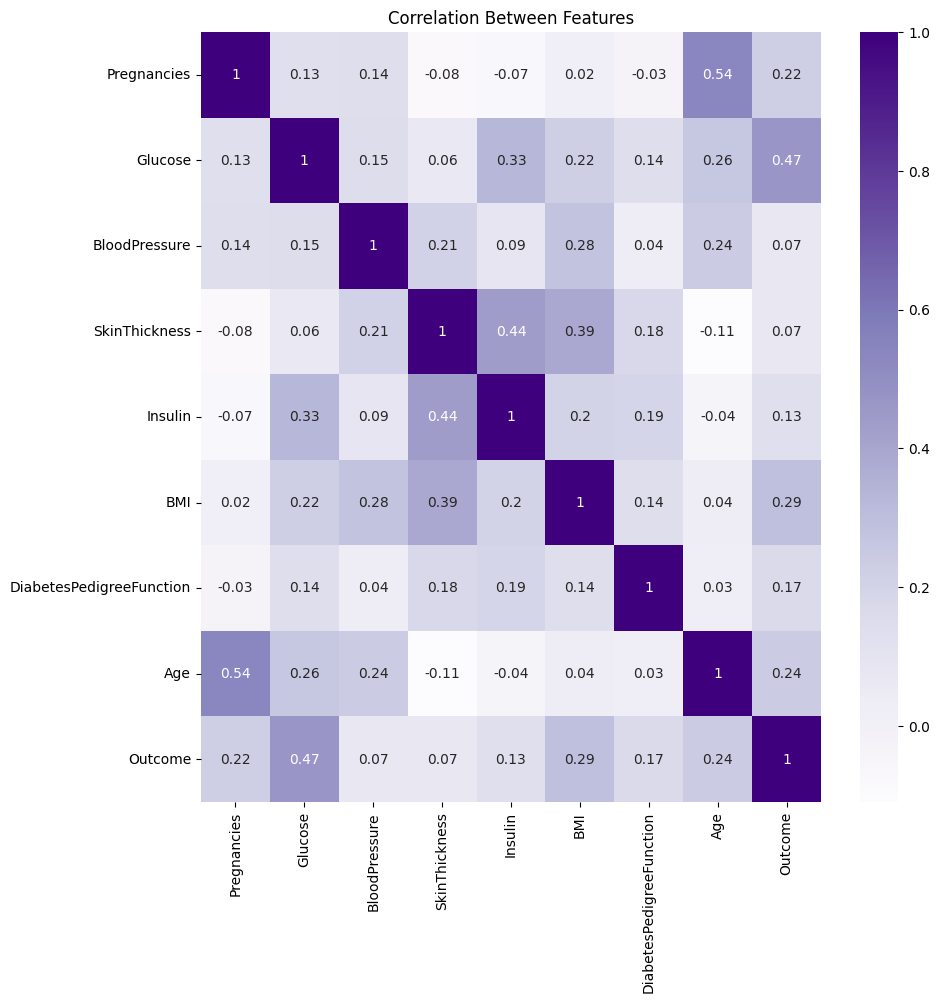

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr().round(2), annot=True, cmap='Purples')
plt.title("Correlation Between Features")
plt.show()

In [21]:
df_corr = df.corr()
hig_corr_features = df_corr.index[abs(df_corr["Outcome"]) >= 0.12]
hig_corr_features

Index(['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age', 'Outcome'],
      dtype='object')

### 2.3.11) Standard Deviation

In [22]:
df.var()

Pregnancies                   11.35
Glucose                     1022.25
BloodPressure                374.65
SkinThickness                254.47
Insulin                    13281.18
BMI                           62.16
DiabetesPedigreeFunction       0.11
Age                          138.30
Outcome                        0.23
dtype: float64

# 3) Data Preprocessing

## 3.1) Splitting features (X) and labels (y)

In [23]:
X = df.drop('Outcome', axis='columns')
y = df.Outcome

In [24]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.60,0.63,50
1,1,85,66,29,0,26.60,0.35,31
2,8,183,64,0,0,23.30,0.67,32
3,1,89,66,23,94,28.10,0.17,21
4,0,137,40,35,168,43.10,2.29,33


## 3.2) Extracting effective features

In [25]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X, y, random_state=42)
pd.Series(mi, index=X.columns).sort_values(ascending=False)

Glucose                    0.11
BMI                        0.08
Pregnancies                0.06
Age                        0.05
DiabetesPedigreeFunction   0.01
Insulin                    0.01
SkinThickness              0.00
BloodPressure              0.00
dtype: float64

In [26]:
X_new = X.drop(['SkinThickness','BloodPressure'], axis='columns')
X_new

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.60,0.63,50
1,1,85,0,26.60,0.35,31
2,8,183,0,23.30,0.67,32
3,1,89,94,28.10,0.17,21
4,0,137,168,43.10,2.29,33
...,...,...,...,...,...,...
763,10,101,180,32.90,0.17,63
764,2,122,0,36.80,0.34,27
765,5,121,112,26.20,0.24,30
766,1,126,0,30.10,0.35,47


## 3.3) Splitting data into training & testing sets

`stratify=y`: ensures that both training and test sets have same proportion of 0s and 1s (important for imbalanced data).

`random_state=10`: ensures we get the same split every time (reproducibility).

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, stratify=y, random_state=10)

In [28]:
X_test.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
147,2,106,119,30.50,1.40,34
754,8,154,0,32.40,0.44,45
686,3,130,0,23.10,0.31,22
230,4,142,0,44.00,0.65,22
656,2,101,90,21.80,0.15,22


In [29]:
y_test.head()

147    0
754    1
686    0
230    1
656    0
Name: Outcome, dtype: int64

## 3.4) Scaling the features

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_new_scaled = scaler.transform(X_new)

# 4) Model Building and Evalauations

## 4.1) Evaluation module

In [31]:
def evaluate(model, X_test_scaled, y_test, average='weighted'):
  y_pred = model.predict(X_test_scaled)
  acc = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average=average)
  recall = recall_score(y_test, y_pred, average=average)
  f1 = f1_score(y_test, y_pred, average=average)
  scores = cross_val_score(model, X_new_scaled, y, cv=5, scoring='accuracy')

  print(f'Accuracy: {acc:.2f}')
  print(f'Precision: {precision:.2f}')
  print(f'Recall: {recall:.2f}')
  print(f'F1-score: {f1:.2f}')
  print(f"{type(model).__name__} Cross-Validation Accuracy: {np.mean(scores):.2f}")
  print(classification_report(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
  plt.title('Confusion Matrix')
  plt.show()

## 4.2) Machine Learning Models

### 4.2.1) Random Forest Classifier

In [32]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier()

Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1-score: 0.81
RandomForestClassifier Cross-Validation Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       125
           1       0.72      0.75      0.74        67

    accuracy                           0.81       192
   macro avg       0.79      0.80      0.80       192
weighted avg       0.81      0.81      0.81       192



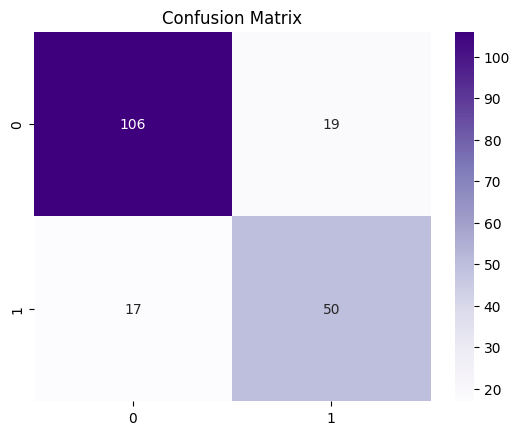

In [33]:
evaluate(random_forest, X_test_scaled, y_test, average='weighted')

### 4.2.2) GradientBoosting Classifier

In [34]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

Accuracy: 0.80
Precision: 0.80
Recall: 0.80
F1-score: 0.80
GradientBoostingClassifier Cross-Validation Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       125
           1       0.71      0.72      0.71        67

    accuracy                           0.80       192
   macro avg       0.78      0.78      0.78       192
weighted avg       0.80      0.80      0.80       192



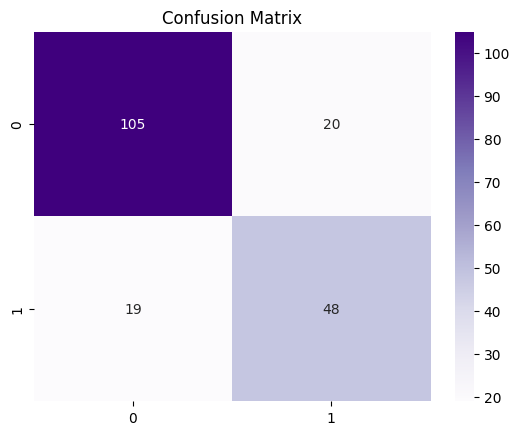

In [35]:
evaluate(gradient_boosting, X_test_scaled, y_test, average='weighted')

### 4.2.3) Ada Boost Classifier

In [36]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train_scaled, y_train)

AdaBoostClassifier()

Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1-score: 0.76
AdaBoostClassifier Cross-Validation Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       125
           1       0.65      0.69      0.67        67

    accuracy                           0.76       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.76      0.76      0.76       192



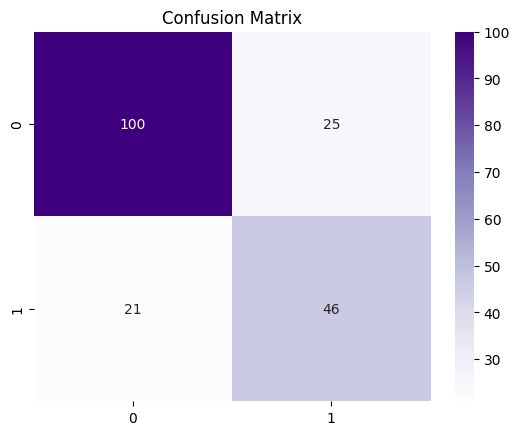

In [37]:
evaluate(adaboost, X_test_scaled, y_test, average='weighted')

### 4.2.4) Decision Tree Classifier

In [38]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

Accuracy: 0.68
Precision: 0.69
Recall: 0.68
F1-score: 0.68
DecisionTreeClassifier Cross-Validation Accuracy: 0.70
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       125
           1       0.54      0.58      0.56        67

    accuracy                           0.68       192
   macro avg       0.65      0.66      0.66       192
weighted avg       0.69      0.68      0.68       192



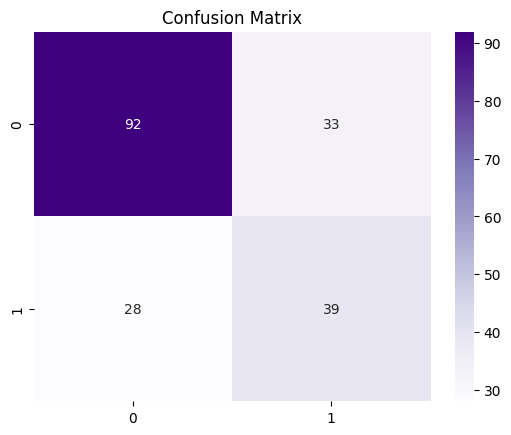

In [39]:
evaluate(decision_tree, X_test_scaled, y_test, average='weighted')

### 4.2.5) Support Vectore Machine Classifier

In [40]:
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1-score: 0.78
SVC Cross-Validation Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       125
           1       0.71      0.63      0.67        67

    accuracy                           0.78       192
   macro avg       0.76      0.75      0.75       192
weighted avg       0.78      0.78      0.78       192



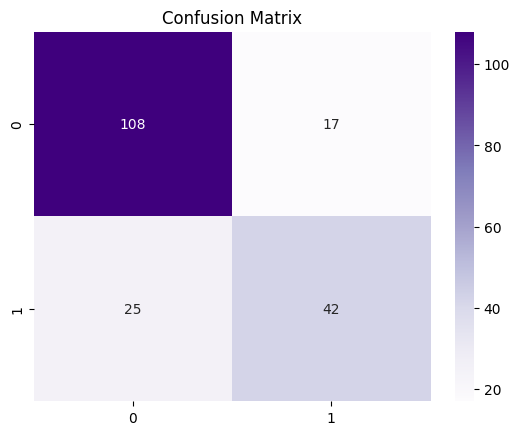

In [41]:
evaluate(svm, X_test_scaled, y_test, average='weighted')

### 4.2.6) K-Nearest Neighbors Classifier

In [42]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Accuracy: 0.74
Precision: 0.75
Recall: 0.74
F1-score: 0.75
KNeighborsClassifier Cross-Validation Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       125
           1       0.62      0.70      0.66        67

    accuracy                           0.74       192
   macro avg       0.72      0.73      0.73       192
weighted avg       0.75      0.74      0.75       192



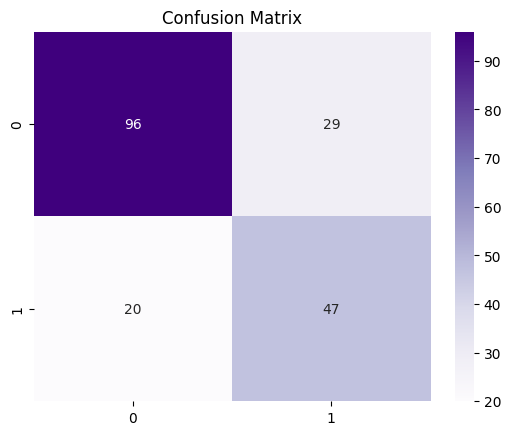

In [43]:
evaluate(knn, X_test_scaled, y_test, average='weighted')

### 4.2.7) Logistic Regression Classifier

In [44]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression()

Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1-score: 0.81
LogisticRegression Cross-Validation Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       125
           1       0.76      0.67      0.71        67

    accuracy                           0.81       192
   macro avg       0.80      0.78      0.79       192
weighted avg       0.81      0.81      0.81       192



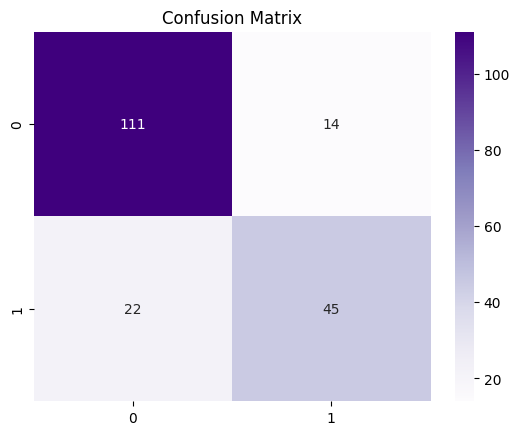

In [45]:
evaluate(logistic_regression, X_test_scaled, y_test, average='weighted')

### 4.2.8) Gaussian Naive Bays Classifier

In [46]:
gaussian = GaussianNB()
gaussian.fit(X_train_scaled, y_train)

GaussianNB()

Accuracy: 0.76
Precision: 0.75
Recall: 0.76
F1-score: 0.75
GaussianNB Cross-Validation Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       125
           1       0.66      0.63      0.64        67

    accuracy                           0.76       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.76      0.75       192



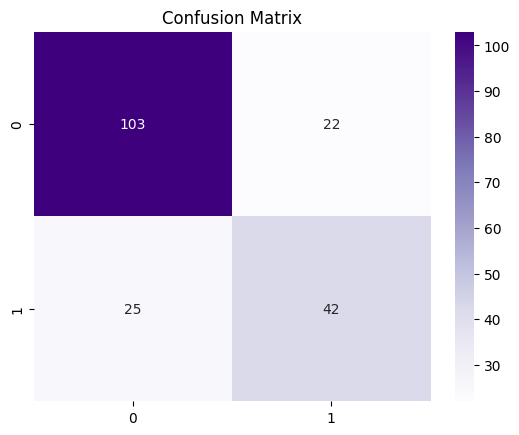

In [47]:
evaluate(gaussian, X_test_scaled, y_test, average='weighted')

### 4.2.9) Extreme Gradient Boosting Classifier

In [48]:
xgboost = XGBClassifier()
xgboost.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1-score: 0.74
XGBClassifier Cross-Validation Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       125
           1       0.62      0.66      0.64        67

    accuracy                           0.74       192
   macro avg       0.71      0.72      0.72       192
weighted avg       0.74      0.74      0.74       192



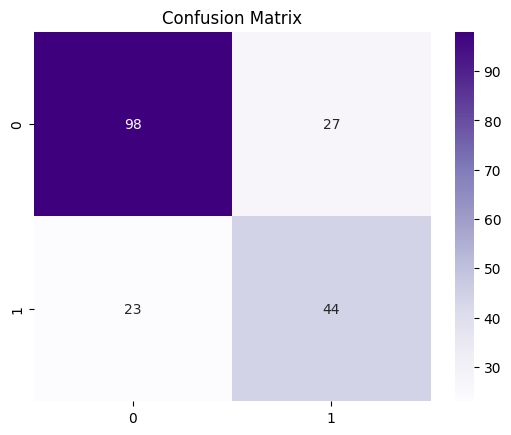

In [49]:
evaluate(xgboost, X_test_scaled, y_test, average='weighted')

# 5) Save The Best Model

The best model with highest accuracy and other metrics was Logistic Regression.

In [50]:
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [51]:
joblib.dump(pipe_lr, './model/diabetes_lr_model.pkl')

['./model/diabetes_lr_model.pkl']

# 6) Load Saved Model & Predict an Example

In [52]:
loaded_pipe_lr = joblib.load('./model/diabetes_lr_model.pkl')

In [53]:
example = [[2, 101, 90, 21.80, 0.15, 22]]
loaded_pipe_lr.predict(example)

array([0], dtype=int64)

**Instance 656th in test set =**

**2-time Pregnancies +**

**Glucose 101 +**

**Inuline 90 +**

**BMI 21.80 +**

**DiabetesPedigreeFunction 0.15 +**

**Age 22**

**--> outcome = 0**